In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import pandas as pd
import math

# Nhap du lieu

In [2]:
data = pd.read_csv("data_Y1.csv")
data.head()

,MemberID,Year,ClaimsTruncated,TARGET,trainset,age_05,age_15,age_25,age_35,age_45,...,drugCount_max,drugCount_min,drugCount_ave,drugcount_months,labCount_max,labCount_min,labCount_ave,labcount_months,labNull,drugNull
0,99006533,Y1,0,0.0,1,0,0,0,0,0,...,0,0,0.00000,0,10,10,10.000000,1,0,1
1,99016908,Y1,0,0.0,1,0,0,0,0,0,...,5,2,3.90909,11,6,1,2.750000,4,0,0
2,99024978,Y1,0,0.0,1,0,0,0,0,0,...,0,0,0.00000,0,6,6,6.000000,1,0,1
3,99030167,Y1,0,0.0,1,0,0,0,0,0,...,4,1,2.00000,6,6,1,3.333333,3,0,0
4,99030311,Y1,0,0.0,1,0,0,0,0,0,...,2,2,2.00000,1,5,2,2.750000,4,0,0


In [3]:
data.drop("MemberID", axis = 1, inplace = True)
data.drop("Year", axis = 1, inplace = True)

y = data['TARGET']
X = data.loc[:, data.columns != 'TARGET']
X.head()

,ClaimsTruncated,trainset,age_05,age_15,age_25,age_35,age_45,age_55,age_65,age_75,...,drugCount_max,drugCount_min,drugCount_ave,drugcount_months,labCount_max,labCount_min,labCount_ave,labcount_months,labNull,drugNull
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0.00000,0,10,10,10.000000,1,0,1
1,0,1,0,0,0,0,0,0,0,1,...,5,2,3.90909,11,6,1,2.750000,4,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0.00000,0,6,6,6.000000,1,0,1
3,0,1,0,0,0,0,0,0,0,1,...,4,1,2.00000,6,6,1,3.333333,3,0,0
4,0,1,0,0,0,0,0,0,0,1,...,2,2,2.00000,1,5,2,2.750000,4,0,0


In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler().fit(X)
new_X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.3, random_state=123)

In [17]:
def eval(model, X_test, y_test):
    pred_y = model.predict(X_test) # your predicted y values
    pred_y = pred_y.astype(int)
    # The root mean square logarithmic error
    msle = np.mean( (np.log(pred_y + 1) - np.log(y_test + 1)) ** 2)
    rmsle = math.sqrt(msle)
    from sklearn.metrics import r2_score
    r2 = r2_score(pred_y, y_test)
    return rmsle, r2

In [6]:
from sklearn import ensemble

model= ensemble.RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=500,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1, warm_start=False)

In [19]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=0, solver='sag',multi_class='multinomial', max_iter=800)

In [8]:
model_linear = LinearRegression()

# Thu tren du lieu ban dau

In [9]:
model.fit(X_train, y_train)
eval(model, X_test, y_test)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  8.9min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.8s finished


(0.486384540326108, -15.954333408742908)

In [20]:
model_lr.fit(X_train, y_train)
eval(model_lr, X_test, y_test)

(0.5165575823296964, -14.29905061315172)

In [18]:
model_linear.fit(X_train, y_train)
eval(model_linear, X_test, y_test)

C:\Users\WELCOME\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


(inf, -14.757507947979983)

# Them features

In [21]:
a = model.feature_importances_
x = { i : a[i] for i in range(0, len(a) ) }

In [22]:
import operator
sorted_x = sorted(x.items(), key=operator.itemgetter(1))

In [23]:
print(sorted_x)

[(1, 0.0), (139, 1.2608419024388143e-05), (87, 2.59778697564033e-05), (119, 3.1463951652687555e-05), (3, 4.668281553579646e-05), (86, 5.081177918017776e-05), (138, 6.031848861441131e-05), (12, 6.079276990579943e-05), (4, 7.76290136810282e-05), (6, 9.393113224229373e-05), (88, 9.863582428807949e-05), (7, 9.925425354658517e-05), (5, 0.00011838541955609699), (8, 0.00013914395898705176), (120, 0.0001702430423706832), (2, 0.00018968000964447244), (98, 0.00021878763013241027), (97, 0.00022477711702463942), (40, 0.00022975473075749326), (116, 0.0002462091495989166), (13, 0.0002825516621535175), (48, 0.00039313546934260875), (50, 0.0004022367369289873), (34, 0.000404429605779839), (126, 0.0004516284973093914), (58, 0.0006101213710803331), (137, 0.0006695055358587629), (134, 0.0007021129239267686), (71, 0.0007115511274805763), (129, 0.0007683825748750025), (106, 0.0007758534131712786), (117, 0.0008137606880046908), (77, 0.0008314428904853008), (22, 0.0008368217370011282), (53, 0.000904616418037

In [24]:
Df = pd.DataFrame()
rmsle_test = []
r2_test = []
for i in range(70):
    Df = pd.concat([Df, X.iloc[:, sorted_x[len(sorted_x)-i-1][0]]], axis = 1)
    scaler = StandardScaler().fit(Df)
    new_X = scaler.transform(Df)
    X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.3, random_state=123)
    model_linear.fit(X_train, y_train)
    rmsle, r2 = eval(model_linear, X_test, y_test)
    rmsle_test.append(rmsle)
    r2_test.append(r2)
    

In [25]:
print(rmsle_test)
print(r2_test)

[0.5029322712489035, 0.49793344578438775, 0.497466147778169, 0.49695441483131325, 0.49696409850785, 0.4944071420238563, 0.49516971673534077, 0.49509025287618724, 0.4936457499457989, 0.49297117365770565, 0.490784373085998, 0.49028086504817514, 0.4901851250712394, 0.4898105133999998, 0.4896499004683121, 0.48883370315255514, 0.48946561453323606, 0.4893274820682729, 0.4891341075175921, 0.4896072711978094, 0.4892946175462217, 0.48934332422312654, 0.48973548794818045, 0.48978917381244325, 0.48985252979692623, 0.48944565582343985, 0.4900729965667213, 0.4898196689161794, 0.48983827366099325, 0.48943676157193416, 0.4897674604753819, 0.4900856295119352, 0.4897630685426291, 0.4895666022426172, 0.4890067730946499, 0.4889151649892865, 0.4889864413215034, 0.48896235368508834, 0.4890452984647999, 0.48893092362401425, 0.4888120966413583, 0.4883900400324184, 0.48865285008833054, 0.4895866122024978, 0.48969596917196256, 0.4893167991207014, 0.4900765777424117, 0.49047015412257583, 0.49036926186834756, 0.

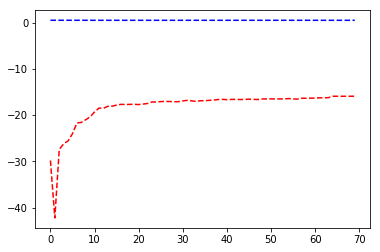

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(rmsle_test, 'b--')
plt.plot(r2_test, 'r--')

In [27]:
print(r2_test[6])
print(rmsle_test[6])

-21.718334767274758
0.49516971673534077


In [28]:
new_data = pd.DataFrame()
for i in range(0,6):
    new_data = pd.concat([new_data, X.iloc[:, sorted_x[len(sorted_x)-i-1][0]]], axis = 1)
new_data.head()

,no_Claims,ClaimsTruncated,sexMISS,pcg22,drugCount_ave,age_85
0,12,0,1,0,0.00000,0
1,10,0,0,0,3.90909,0
2,11,0,0,0,0.00000,0
3,26,0,0,0,2.00000,0
4,11,0,1,0,2.00000,0


In [29]:
new_data['no_Claims_2'] = new_data['no_Claims']**2
new_data['ClaimsTruncated_2'] = new_data['ClaimsTruncated']**2
new_data['sexMISS_2'] = new_data['sexMISS']**2
new_data['pcg22_2'] = new_data['pcg22']**2
new_data['drugCount_ave_2'] = new_data['drugCount_ave']**2
new_data['age_85_2'] = new_data['age_85']**2
new_data['no_Claims__ClaimsTruncated'] = new_data['no_Claims']*new_data['ClaimsTruncated']
new_data['no_Claims__sex_MISS'] = new_data['no_Claims']*new_data['sexMISS']
new_data['no_Claims__pcg22'] = new_data['no_Claims']*new_data['pcg22']
new_data['no_Claims__drugCount_ave'] = new_data['no_Claims']*new_data['drugCount_ave']
new_data['no_Claims__age_85'] = new_data['no_Claims']*new_data['age_85']
new_data['no_Claims__age_85'] = new_data['no_Claims']*new_data['age_85']
new_data['ClaimsTruncated__sexMISS'] = new_data['ClaimsTruncated']*new_data['sexMISS']
new_data['ClaimsTruncated__pcg22'] = new_data['ClaimsTruncated']*new_data['pcg22']
new_data['ClaimsTruncated__drugCount_ave'] = new_data['ClaimsTruncated']*new_data['drugCount_ave']
new_data['ClaimsTruncated__age_85'] = new_data['ClaimsTruncated']*new_data['age_85']
new_data['sexMISS__pcg22'] = new_data['sexMISS']*new_data['pcg22']
new_data['sexMISS__drugCount_ave'] = new_data['sexMISS']*new_data['drugCount_ave']
new_data['sexMISS__age_85'] = new_data['sexMISS']*new_data['age_85']
new_data['pcg22__drugCount_ave'] = new_data['pcg22']*new_data['drugCount_ave']
new_data['pcg22__age_85'] = new_data['pcg22']*new_data['age_85']
new_data['drugCount_ave__age_85'] = new_data['drugCount_ave']*new_data['age_85']
new_data.drop(new_data.columns[[0, 1, 2, 3, 4, 5]], axis=1, inplace=True)
new_data.head()

,no_Claims_2,ClaimsTruncated_2,sexMISS_2,pcg22_2,drugCount_ave_2,age_85_2,no_Claims__ClaimsTruncated,no_Claims__sex_MISS,no_Claims__pcg22,no_Claims__drugCount_ave,...,ClaimsTruncated__sexMISS,ClaimsTruncated__pcg22,ClaimsTruncated__drugCount_ave,ClaimsTruncated__age_85,sexMISS__pcg22,sexMISS__drugCount_ave,sexMISS__age_85,pcg22__drugCount_ave,pcg22__age_85,drugCount_ave__age_85
0,144,0,1,0,0.000000,0,0,12,0,0.0000,...,0,0,0.0,0,0,0.0,0,0.0,0,0.0
1,100,0,0,0,15.280985,0,0,0,0,39.0909,...,0,0,0.0,0,0,0.0,0,0.0,0,0.0
2,121,0,0,0,0.000000,0,0,0,0,0.0000,...,0,0,0.0,0,0,0.0,0,0.0,0,0.0
3,676,0,0,0,4.000000,0,0,0,0,52.0000,...,0,0,0.0,0,0,0.0,0,0.0,0,0.0
4,121,0,1,0,4.000000,0,0,11,0,22.0000,...,0,0,0.0,0,0,2.0,0,0.0,0,0.0


In [41]:
X1 = pd.concat([X, new_data], axis = 1)
X1.head()

,ClaimsTruncated,trainset,age_05,age_15,age_25,age_35,age_45,age_55,age_65,age_75,...,ClaimsTruncated__sexMISS,ClaimsTruncated__pcg22,ClaimsTruncated__drugCount_ave,ClaimsTruncated__age_85,sexMISS__pcg22,sexMISS__drugCount_ave,sexMISS__age_85,pcg22__drugCount_ave,pcg22__age_85,drugCount_ave__age_85
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0.0,0,0,0.0,0,0.0,0,0.0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0.0,0,0,0.0,0,0.0,0,0.0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0.0,0,0,0.0,0,0.0,0,0.0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0.0,0,0,0.0,0,0.0,0,0.0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0.0,0,0,2.0,0,0.0,0,0.0


# Kiem tra tren data moi

In [42]:
scaler = StandardScaler().fit(X1)
new_X1 = scaler.transform(X1)
X_train, X_test, y_train, y_test = train_test_split(new_X1, y, test_size=0.3, random_state=123)

In [34]:
model.fit(X_train, y_train)
rmsle_train, r2_train = eval(model, X_train, y_train)
rmsle_test, r2_test = eval(model, X_test, y_test)
print(rmsle_train, r2_train)
print(rmsle_test, r2_test)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 11.8min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.1s


0.48423325956441304 -16.13572619406114
0.4859730031722313 -16.42667628378033


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.3s finished


In [35]:
model_lr.fit(X_train, y_train)
rmsle_train, r2_train = eval(model_lr, X_train, y_train)
rmsle_test, r2_test = eval(model_lr, X_test, y_test)
print(rmsle_train, r2_train)
print(rmsle_test, r2_test)

0.5230323661028603 -41.569293227337155
0.5133909045376458 -16.69410964920945


C:\Users\WELCOME\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [36]:
model_linear.fit(X_train, y_train)
rmsle_train, r2_train = eval(model_linear, X_train, y_train)
rmsle_test, r2_test = eval(model_linear, X_test, y_test)
print(rmsle_train, r2_train)
print(rmsle_test, r2_test)

inf -13.591818331415089
inf -13.057012915929642


C:\Users\WELCOME\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\WELCOME\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


# Them feautures

In [37]:
a = model.feature_importances_
x = { i : a[i] for i in range(0, len(a) ) }
sorted_x = sorted(x.items(), key=operator.itemgetter(1))

In [45]:
Df = pd.DataFrame()
rmsle_test = []
r2_test = []
for i in range(70):
    Df = pd.concat([Df, X1.iloc[:, sorted_x[len(sorted_x)-i-1][0]]], axis = 1)
    scaler = StandardScaler().fit(Df)
    new_X2 = scaler.transform(Df)
    X_train, X_test, y_train, y_test = train_test_split(new_X2, y, test_size=0.3, random_state=123)
    model_linear.fit(X_train, y_train)
    rmsle, r2 = eval(model_linear, X_test, y_test)
    rmsle_test.append(rmsle)
    r2_test.append(r2)

In [44]:
X1.head()

,ClaimsTruncated,trainset,age_05,age_15,age_25,age_35,age_45,age_55,age_65,age_75,...,ClaimsTruncated__sexMISS,ClaimsTruncated__pcg22,ClaimsTruncated__drugCount_ave,ClaimsTruncated__age_85,sexMISS__pcg22,sexMISS__drugCount_ave,sexMISS__age_85,pcg22__drugCount_ave,pcg22__age_85,drugCount_ave__age_85
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0.0,0,0,0.0,0,0.0,0,0.0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0.0,0,0,0.0,0,0.0,0,0.0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0.0,0,0,0.0,0,0.0,0,0.0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0.0,0,0,0.0,0,0.0,0,0.0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0.0,0,0,2.0,0,0.0,0,0.0


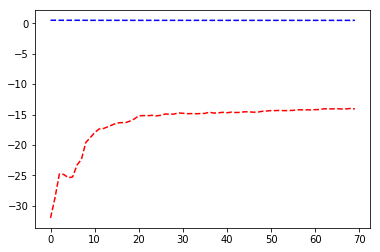

In [46]:
plt.plot(rmsle_test, 'b--')
plt.plot(r2_test, 'r--')

Sai so R2 giam dang ke sau khoang 20 vong lap

In [68]:
new_data = pd.DataFrame()
for i in range(20):
    new_data = pd.concat([new_data, X1.iloc[:, sorted_x[len(sorted_x)-i-1][0]]], axis = 1)
new_data.head()

,no_Claims__drugCount_ave,ClaimsTruncated__drugCount_ave,sexMISS,no_Claims__ClaimsTruncated,no_Claims__sex_MISS,sexMISS_2,ps5,no_Claims__age_85,ClaimsTruncated,CharlsonIndexI_max,sp6,age_MISS,ClaimsTruncated_2,pcg27,pcg22,pcg22_2,PayDelay_min,no_Claims,no_Claims_2,pcg31
0,0.0000,0.0,1,0,12,1,0,0,0,2,4,0,0,0,0,0,30,12,144,0
1,39.0909,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,10,100,0
2,0.0000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,11,121,0
3,52.0000,0.0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,17,26,676,0
4,22.0000,0.0,1,0,11,1,0,0,0,2,0,0,0,0,0,0,67,11,121,0


In [69]:
l = new_data.columns

In [71]:
for i in range(len(l)):
    for j in range(1,len(l)):
        new_data['F{}'.format(i*j)] = new_data[l[i]] * new_data[l[j]]
new_data.head()

,no_Claims__drugCount_ave,ClaimsTruncated__drugCount_ave,sexMISS,no_Claims__ClaimsTruncated,no_Claims__sex_MISS,sexMISS_2,ps5,no_Claims__age_85,ClaimsTruncated,CharlsonIndexI_max,...,F256,F272,F288,F304,F289,F306,F323,F324,F342,F361
0,0.0000,0.0,1,0,12,1,0,0,0,2,...,900,360,4320,0,144,1728,0,20736,0,0
1,39.0909,0.0,0,0,0,0,0,0,0,0,...,625,250,2500,0,100,1000,0,10000,0,0
2,0.0000,0.0,0,0,0,0,0,0,0,0,...,576,264,2904,0,121,1331,0,14641,0,0
3,52.0000,0.0,0,0,0,0,0,0,0,2,...,289,442,11492,0,676,17576,0,456976,0,0
4,22.0000,0.0,1,0,11,1,0,0,0,2,...,4489,737,8107,0,121,1331,0,14641,0,0


In [72]:
for i in range(len(l)):
    new_data[l[i]] = new_data[l[i]] ** 2
new_data.head()

,no_Claims__drugCount_ave,ClaimsTruncated__drugCount_ave,sexMISS,no_Claims__ClaimsTruncated,no_Claims__sex_MISS,sexMISS_2,ps5,no_Claims__age_85,ClaimsTruncated,CharlsonIndexI_max,...,F256,F272,F288,F304,F289,F306,F323,F324,F342,F361
0,0.000000,0.0,1,0,144,1,0,0,0,4,...,900,360,4320,0,144,1728,0,20736,0,0
1,1528.098463,0.0,0,0,0,0,0,0,0,0,...,625,250,2500,0,100,1000,0,10000,0,0
2,0.000000,0.0,0,0,0,0,0,0,0,0,...,576,264,2904,0,121,1331,0,14641,0,0
3,2704.000000,0.0,0,0,0,0,0,0,0,4,...,289,442,11492,0,676,17576,0,456976,0,0
4,484.000000,0.0,1,0,121,1,0,0,0,4,...,4489,737,8107,0,121,1331,0,14641,0,0


In [74]:
X2 = pd.concat([X1, new_data], axis = 1)
X2.head()

,ClaimsTruncated,trainset,age_05,age_15,age_25,age_35,age_45,age_55,age_65,age_75,...,F256,F272,F288,F304,F289,F306,F323,F324,F342,F361
0,0,1,0,0,0,0,0,1,0,0,...,900,360,4320,0,144,1728,0,20736,0,0
1,0,1,0,0,0,0,0,0,0,1,...,625,250,2500,0,100,1000,0,10000,0,0
2,0,1,0,0,0,0,0,0,0,1,...,576,264,2904,0,121,1331,0,14641,0,0
3,0,1,0,0,0,0,0,0,0,1,...,289,442,11492,0,676,17576,0,456976,0,0
4,0,1,0,0,0,0,0,0,0,1,...,4489,737,8107,0,121,1331,0,14641,0,0


# Kiem tra tren X2

In [75]:
scaler = StandardScaler().fit(X2)
new_X2 = scaler.transform(X2)
X_train, X_test, y_train, y_test = train_test_split(new_X2, y, test_size=0.3, random_state=123)

In [76]:
model.fit(X_train, y_train)
rmsle_train, r2_train = eval(model, X_train, y_train)
rmsle_test, r2_test = eval(model, X_test, y_test)
print(rmsle_train, r2_train)
print(rmsle_test, r2_test)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 26.5min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.6s


0.48548647192958133 -15.806777577404567
0.48734022090288676 -15.741624035972464


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.0s finished


In [77]:
model_linear.fit(X_train, y_train)
rmsle_train, r2_train = eval(model_linear, X_train, y_train)
rmsle_test, r2_test = eval(model_linear, X_test, y_test)
print(rmsle_train, r2_train)
print(rmsle_test, r2_test)

inf -10.62000509031427
inf -4.383928760298694e-05


C:\Users\WELCOME\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\WELCOME\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


In [78]:
model_lr.fit(X_train, y_train)
rmsle_train, r2_train = eval(model_lr, X_train, y_train)
rmsle_test, r2_test = eval(model_lr, X_test, y_test)
print(rmsle_train, r2_train)
print(rmsle_test, r2_test)

0.518016410054263 -15.583777034914299
0.5111712067849326 -9.795166405269265


C:\Users\WELCOME\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [87]:
model= ensemble.RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=500,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1, warm_start=False)

In [88]:
model.fit(X_train, y_train)
rmsle_train, r2_train = eval(model, X_train, y_train)
rmsle_test, r2_test = eval(model, X_test, y_test)
print(rmsle_train, r2_train)
print(rmsle_test, r2_test)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   46.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.3s


0.48864313521096114 -18.93598601264927
0.48437668126853534 -18.747734017283893


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.6s finished


Sai so tren test set la 0.4843 tren du lieu moi nhat chay bang random forest, chay bang linear cho ket qua bang inf ??

In [89]:
model= ensemble.RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
            max_features=12, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=500,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1, warm_start=False)

In [90]:
model.fit(X_train, y_train)
rmsle_train, r2_train = eval(model, X_train, y_train)
rmsle_test, r2_test = eval(model, X_test, y_test)
print(rmsle_train, r2_train)
print(rmsle_test, r2_test)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   52.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.1s


0.4880104859269892 -18.33775856240457
0.4837939696446693 -18.257344710164723


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.4s finished


Sai so tren test set giam con 0.4837 khi tang max_features tu 10 len 12

In [95]:
model= ensemble.RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
            max_features=14, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=500,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1, warm_start=False)

In [96]:
model.fit(X_train, y_train)
rmsle_train, r2_train = eval(model, X_train, y_train)
rmsle_test, r2_test = eval(model, X_test, y_test)
print(rmsle_train, r2_train)
print(rmsle_test, r2_test)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   48.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.1s


0.4875836122309779 -17.78456919843499
0.48371223373601907 -17.589720840185837


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.3s finished


Sai so tren test set tiep tuc giam khi tang max_feature tu 12 len 14

In [97]:
model= ensemble.RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
            max_features=16, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=500,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1, warm_start=False)

In [98]:
model.fit(X_train, y_train)
rmsle_train, r2_train = eval(model, X_train, y_train)
rmsle_test, r2_test = eval(model, X_test, y_test)
print(rmsle_train, r2_train)
print(rmsle_test, r2_test)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  2.7min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    7.9s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    9.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:

0.48724081768303634 -17.32621219285576
0.48367088418596843 -17.177508140885497


[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    3.3s finished


Sai tren test set giam con 0.4836 khi tang max_features len 16 va n_estimators len 2000